In [2]:
import igraph as ig
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [13]:
data_per_tr = pd.read_csv("../correlations/training/dimensionality_reduction_1/10_10_10/synolitic_method_1/features/perception/mean.txt")
data_im_tr = pd.read_csv("../correlations/training/dimensionality_reduction_1/10_10_10/synolitic_method_1/features/imagery/mean.txt")
data_per_test = pd.read_csv("../correlations/test/dimensionality_reduction_1/10_10_10/synolitic_method_1/features/perception/mean.txt")
data_im_test = pd.read_csv("../correlations/test/dimensionality_reduction_1/10_10_10/synolitic_method_1/features/imagery/mean.txt")

In [14]:
data_per_tr = data_per_tr[["sum", "mean", "quantile_1lt", "quantile_2gt", "std"]]
data_im_tr = data_im_tr[["sum", "mean", "quantile_1lt", "quantile_2gt", "std"]]
data_per_test = data_per_test[["sum", "mean", "quantile_1lt", "quantile_2gt", "std"]]
data_im_test = data_im_test[["sum", "mean", "quantile_1lt", "quantile_2gt", "std"]]
data_per_tr

,sum,mean,quantile_1lt,quantile_2gt,std
0,-25325.508992,-0.512859,-0.876844,0.637449,0.253512
1,-26789.678202,-0.535077,-0.891206,0.589783,0.242006
2,-28145.194368,-0.551294,-0.900275,0.509435,0.226487
3,-28031.028001,-0.547952,-0.894787,0.531662,0.223802
4,-28207.429512,-0.551368,-0.902269,0.529505,0.226590
...,...,...,...,...,...
126,-23906.638959,-0.464775,-0.719963,0.554947,0.197532
127,-24086.193656,-0.467375,-0.721458,0.548760,0.195657
128,-24149.846816,-0.469385,-0.724041,0.527650,0.193542
129,-23629.038970,-0.463051,-0.722770,0.545390,0.200753


In [18]:
data_per_test

,sum,mean,quantile_1lt,quantile_2gt,std
0,-24432.386736,-0.500643,-0.917318,0.825869,0.323162
1,-25233.073251,-0.512992,-0.899356,0.744841,0.286539
2,-24340.364160,-0.498676,-0.886415,0.762123,0.293074
3,-23836.864142,-0.489333,-0.855503,0.663803,0.267096
4,-17260.903955,-0.383039,-0.836693,0.790945,0.381347
5,-15993.413254,-0.358219,-0.827889,0.788168,0.398177
6,-20826.929106,-0.440185,-0.842045,0.809313,0.327851
7,-20882.406240,-0.443326,-0.807602,0.686246,0.292105
8,-20910.846809,-0.432292,-0.836602,0.821721,0.338325
9,-21959.838191,-0.450449,-0.830012,0.801190,0.310013


<function matplotlib.pyplot.show(close=None, block=None)>

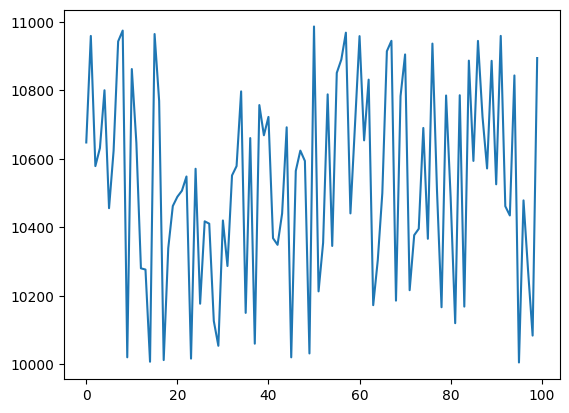

In [5]:
import matplotlib.pyplot as plt
import numpy as np

a = np.random.rand(100) * 1000 + 10000
plt.plot([i for i in range(len(a))], a)
plt.show

In [7]:
import preprocessed_data
len(preprocessed_data.all_files)

271

In [10]:
len(preprocessed_data.imagery_)

30

In [12]:
len(preprocessed_data.perception_training)

131

In [8]:
import nibabel
import preprocessed_data
import processed_data_10_10_10


In [9]:
for i in preprocessed_data.data_imagery:
    print(len(i))

AttributeError: module 'preprocessed_data' has no attribute 'data_imagery'